**The relationship between installing CCTV and crime rate**
<br><br>
2016110838 행정학전공 홍서이

**Before data analysis**
- import libraries
- set font for Korean

In [31]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

!pip install folium
import folium
geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"



In [32]:
# Setting a Hangul font for data visualization

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

**Creating DataFrames and organizing data**

In this notebook, I would like to analyze the relationship between CCTV and crime. 
For this analysis, I will integrate a total of four pieces of data.
- data1 = Crime in Seoul, 2020
- data2 = Number of CCTV setup in Seoul up to 2021
- data3 = urbanization Area per district in Seoul
- data4 = Population in Seoul, 2020
- data5 = Number of crimes by age in Seoul, 2020


In [33]:
# data1: crime in Seoul in 2020
crime = pd.read_csv('crime_seoul(2020).csv', encoding='cp949')
crime.head()


,자치구,전체 범죄 발생 건수,전체 범죄 검거 건수,살인 발생 건수,살인 검거 건수,강도 발생 건수,강도 검거 건수,강간강제추행 발생 건수,강간강제추행 검거 건수,절도 발생 건수,절도 검거 건수,폭력 발생 건수,폭력 검거 건수
0,종로구,3102,3343,9,7,7,9,192,855,1183,944,1711,1528
1,중구,3411,2323,2,2,5,6,186,128,1642,863,1576,1324
2,용산구,2969,2056,5,3,6,6,230,186,1111,534,1617,1327
3,성동구,2362,1774,5,5,3,3,115,98,1016,565,1223,1103
4,광진구,3601,2511,2,2,4,4,255,224,1664,874,1676,1407


In [34]:
# Get necessary colunms for hypothesis from data1
crime = crime[['자치구', '전체 범죄 발생 건수']]
crime.head()

,자치구,전체 범죄 발생 건수
0,종로구,3102
1,중구,3411
2,용산구,2969
3,성동구,2362
4,광진구,3601


In [35]:
#data2 : Number of CCTV setup in Seoul up to 2021
cctv_setup = pd.read_csv('cctv_setup_seoul.csv', encoding='cp949')
cctv_setup.head()

,자치구,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년 신규 설치 cctv 개수
0,종로구,1772.0,813.0,0.0,0.0,210.0,150.0,1.0,261.0,85.0,9.0,200.0,43.0
1,중 구,2333.0,16.0,114.0,87.0,77.0,236.0,240.0,372.0,386.0,155.0,361.0,289.0
2,용산구,2383.0,34.0,71.0,234.0,125.0,221.0,298.0,351.0,125.0,307.0,617.0,0.0
3,성동구,3602.0,448.0,125.0,212.0,105.0,339.0,310.0,874.0,390.0,262.0,461.0,76.0
4,광진구,2588.0,35.0,57.0,100.0,187.0,98.0,52.0,675.0,465.0,712.0,175.0,32.0


In [36]:
# Get necessary colunms for hypothesis from data2
cctv_setup = cctv_setup[['자치구','cctv 총계','2021년 신규 설치 cctv 개수']]
cctv_setup['cctv(2020)'] = cctv_setup['cctv 총계'] - cctv_setup['2021년 신규 설치 cctv 개수']
cctv_setup.head()

,자치구,cctv 총계,2021년 신규 설치 cctv 개수,cctv(2020)
0,종로구,1772.0,43.0,1729.0
1,중 구,2333.0,289.0,2044.0
2,용산구,2383.0,0.0,2383.0
3,성동구,3602.0,76.0,3526.0
4,광진구,2588.0,32.0,2556.0


In [37]:
# data3 = Area per district in Seoul
area_seoul = pd.read_csv('using_area_seoul.csv')
area_seoul.head()

,자치구,행정구역면적,시가화면적,시가화면적비율
0,서울시,605.24,12.77,53.39
1,종로구,23.91,9.95,99.89
2,중구,9.96,13.37,61.14
3,용산구,21.87,12.47,73.98
4,성동구,16.86,11.80,69.16


In [38]:
# Get necessary colunms for hypothesis from data3
area_seoul = area_seoul[['자치구','시가화면적']]
area_seoul.head()

,자치구,시가화면적
0,서울시,12.77
1,종로구,9.95
2,중구,13.37
3,용산구,12.47
4,성동구,11.80


In [39]:
# data4 = Population in Seoul
population = pd.read_csv('population_in_seoul.csv', encoding='cp949')
population.head()

,자치구,성별,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95세 이상+
0,종로구,계,151581.0,3290.0,4293.0,4730.0,6309.0,14153.0,14905.0,10983.0,...,12351.0,12218.0,11019.0,7797.0,6159.0,5404.0,3546.0,1666.0,589.0,163.0
1,NaN,남자,73323.0,1660.0,2181.0,2402.0,3258.0,6529.0,7326.0,5573.0,...,5994.0,6059.0,5450.0,3733.0,2750.0,2335.0,1445.0,586.0,175.0,42.0
2,NaN,여자,78258.0,1630.0,2112.0,2328.0,3051.0,7624.0,7579.0,5410.0,...,6357.0,6159.0,5569.0,4064.0,3409.0,3069.0,2101.0,1080.0,414.0,121.0
3,중구,계,126467.0,3520.0,3501.0,2874.0,4031.0,9243.0,12269.0,10768.0,...,10010.0,10343.0,9871.0,7102.0,5385.0,4347.0,2787.0,1294.0,503.0,108.0
4,NaN,남자,60956.0,1746.0,1781.0,1447.0,1930.0,4020.0,6042.0,5378.0,...,4939.0,5050.0,4839.0,3360.0,2420.0,1829.0,1059.0,392.0,133.0,27.0


In [40]:
# Get necessary colunms for hypothesis from data4
# 1. Delete NaN
population = population.dropna()

population = [['자치구','계','0~4세','5~9세','10~14세']]

population.head()


AttributeError: 'list' object has no attribute 'head'

In [11]:
# data5 = "2020 서울시 연령별 범죄횟수.xls"
age_crime = pd.read_excel("raw_data/2020 서울시 연령별 범죄횟수.xls", header=1)
age_crime


,기간,서울시,합계,14세미만,14∼19,20∼25,26∼30,31~35,36~40,41∼50,51∼60,61∼70,71세이상,미상
0,2020,서울시,326222,8,12736,25102,27657,24384,28514,58614,63765,35782,14779,34881


As we see "2020 서울시 연령별 범죄횟수.xls", It is shown that there are only 8 crimes by offenders under the age of 14 in Seoul in 2020. Therefore, I will exclude the number of people under the age of 14 from the '계' column of the 'population_in_seoul.csv' file, which means the total number of people in each district in Seoul.

In [12]:
# Merge 1~4 dataset, make a DataFrame "df"
df = pd.merge(area_seoul, cctv_setup)
df = pd.merge(df, crime)
df = pd.merge(df, population)
df

,자치구,시가화면적,cctv 총계,2021년 신규 설치 cctv 개수,cctv(2020),전체 범죄 발생 건수,성별,계,0~4세,5~9세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95세 이상+
0,종로구,9.95,1772.0,43.0,1729.0,3102,계,151581.0,3290.0,4293.0,...,12351.0,12218.0,11019.0,7797.0,6159.0,5404.0,3546.0,1666.0,589.0,163.0
1,용산구,12.47,2383.0,0.0,2383.0,2969,계,222307.0,6496.0,7183.0,...,17944.0,17209.0,15678.0,10904.0,8540.0,7162.0,4971.0,2245.0,838.0,201.0
2,성동구,11.80,3602.0,76.0,3526.0,2362,계,319475.0,10995.0,10819.0,...,25208.0,24814.0,22266.0,15151.0,11495.0,9103.0,5640.0,2488.0,823.0,201.0
3,광진구,13.86,2588.0,32.0,2556.0,3601,계,357176.0,9533.0,11321.0,...,28443.0,27781.0,25451.0,17297.0,12453.0,9389.0,5725.0,2524.0,860.0,217.0
4,동대문구,11.18,2497.0,63.0,2434.0,3401,계,355917.0,10117.0,11247.0,...,26789.0,26911.0,25980.0,19295.0,15091.0,12226.0,7308.0,3209.0,980.0,244.0
5,중랑구,18.23,3296.0,4.0,3292.0,3726,계,384950.0,10913.0,12432.0,...,33264.0,35119.0,32488.0,23046.0,17285.0,12920.0,7431.0,3151.0,1025.0,258.0
6,성북구,11.25,3958.0,188.0,3770.0,2567,계,437443.0,12391.0,16220.0,...,34495.0,32228.0,30149.0,21763.0,17815.0,14526.0,9152.0,3995.0,1337.0,315.0
7,강북구,9.84,2462.0,39.0,2423.0,2770,계,301489.0,7092.0,9066.0,...,25469.0,25837.0,24974.0,18961.0,15841.0,13163.0,7549.0,2947.0,1005.0,240.0
8,도봉구,14.57,1629.0,331.0,1298.0,2179,계,321875.0,8396.0,10884.0,...,28100.0,28264.0,28014.0,19717.0,14983.0,12194.0,7615.0,3532.0,1244.0,298.0
9,노원구,15.89,2415.0,104.0,2311.0,3743,계,517866.0,13854.0,19363.0,...,45317.0,41131.0,38034.0,27190.0,20355.0,16051.0,10456.0,4958.0,1633.0,401.0


In [13]:
# remove unnecessary columns in df

population = population[['자치구','성별','계']]
population = population.dropna()
population = population[['자치구','계']]
population
        

,자치구,계
0,종로구,151581.0
3,중구,126467.0
6,용산구,222307.0
9,성동구,319475.0
12,광진구,357176.0
15,동대문구,355917.0
18,중랑구,384950.0
21,성북구,437443.0
24,강북구,301489.0
27,도봉구,321875.0


In [14]:
# Extract necessary columns from dataset

area_seoul = area_seoul[['자치구','시가화면적']]
cctv_setup = cctv_setup[['자치구','cctv 총계', '2021년 신규 설치 cctv 개수']]
crime = crime[['자치구','전체 범죄 발생 건수']]

print(area_seoul.head(5))
print(cctv_setup.head(5))
print(population.head(5))
print(crime.head(5))

   자치구  시가화면적
0  서울시  12.77
1  종로구   9.95
2   중구  13.37
3  용산구  12.47
4  성동구  11.80
   자치구  cctv 총계  2021년 신규 설치 cctv 개수
0  종로구   1772.0                 43.0
1  중 구   2333.0                289.0
2  용산구   2383.0                  0.0
3  성동구   3602.0                 76.0
4  광진구   2588.0                 32.0
    자치구         계
0   종로구  151581.0
3    중구  126467.0
6   용산구  222307.0
9   성동구  319475.0
12  광진구  357176.0
   자치구  전체 범죄 발생 건수
0  종로구         3102
1   중구         3411
2  용산구         2969
3  성동구         2362
4  광진구         3601


In [15]:
# copy df for Column Calculation

df_copy = df.copy()


In [16]:
# Make new columns for using in regression analysis
# 1. number of cctv per area in 2020

 ##1.1 Get cctv installation data up to 2020
df['cctv(2020)'] = df_copy['cctv 총계'] - df_copy['2021년 신규 설치 cctv 개수']

 ## 1.2 get number of cctv per area in 2020
df_copy['cctv(2020)'] = df['cctv(2020)']
df['면적당_cctv_개수'] = df_copy['cctv(2020)'] / df_copy['시가화면적']

 ##1.3 drop used data: cctv 총계, 2021년 신규 설치 cctv 개수, cctv(2020)
del df['cctv 총계']
del df['2021년 신규 설치 cctv 개수']
del df['cctv(2020)']
del df['시가화면적']
df


,자치구,전체 범죄 발생 건수,성별,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95세 이상+,면적당_cctv_개수
0,종로구,3102,계,151581.0,3290.0,4293.0,4730.0,6309.0,14153.0,14905.0,...,12218.0,11019.0,7797.0,6159.0,5404.0,3546.0,1666.0,589.0,163.0,173.768844
1,용산구,2969,계,222307.0,6496.0,7183.0,6926.0,8125.0,13739.0,19916.0,...,17209.0,15678.0,10904.0,8540.0,7162.0,4971.0,2245.0,838.0,201.0,191.098637
2,성동구,2362,계,319475.0,10995.0,10819.0,9256.0,11771.0,24254.0,31057.0,...,24814.0,22266.0,15151.0,11495.0,9103.0,5640.0,2488.0,823.0,201.0,298.813559
3,광진구,3601,계,357176.0,9533.0,11321.0,11641.0,13908.0,28813.0,39030.0,...,27781.0,25451.0,17297.0,12453.0,9389.0,5725.0,2524.0,860.0,217.0,184.415584
4,동대문구,3401,계,355917.0,10117.0,11247.0,10616.0,13093.0,31926.0,36315.0,...,26911.0,25980.0,19295.0,15091.0,12226.0,7308.0,3209.0,980.0,244.0,217.710197
5,중랑구,3726,계,384950.0,10913.0,12432.0,11890.0,14756.0,23586.0,30942.0,...,35119.0,32488.0,23046.0,17285.0,12920.0,7431.0,3151.0,1025.0,258.0,180.581459
6,성북구,2567,계,437443.0,12391.0,16220.0,16407.0,19766.0,39155.0,39670.0,...,32228.0,30149.0,21763.0,17815.0,14526.0,9152.0,3995.0,1337.0,315.0,335.111111
7,강북구,2770,계,301489.0,7092.0,9066.0,9633.0,12217.0,19982.0,22828.0,...,25837.0,24974.0,18961.0,15841.0,13163.0,7549.0,2947.0,1005.0,240.0,246.239837
8,도봉구,2179,계,321875.0,8396.0,10884.0,11264.0,14328.0,20950.0,22681.0,...,28264.0,28014.0,19717.0,14983.0,12194.0,7615.0,3532.0,1244.0,298.0,89.087165
9,노원구,3743,계,517866.0,13854.0,19363.0,23358.0,29616.0,40252.0,36659.0,...,41131.0,38034.0,27190.0,20355.0,16051.0,10456.0,4958.0,1633.0,401.0,145.437382


In [17]:
# 2. Number of crimes in Seoul per capita
## 2.1 Make Number of crimes in Seoul per capita
df['인당_범죄율'] = df_copy['전체 범죄 발생 건수'] / df_copy['계']

df

,자치구,전체 범죄 발생 건수,성별,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95세 이상+,면적당_cctv_개수,인당_범죄율
0,종로구,3102,계,151581.0,3290.0,4293.0,4730.0,6309.0,14153.0,14905.0,...,11019.0,7797.0,6159.0,5404.0,3546.0,1666.0,589.0,163.0,173.768844,0.020464
1,용산구,2969,계,222307.0,6496.0,7183.0,6926.0,8125.0,13739.0,19916.0,...,15678.0,10904.0,8540.0,7162.0,4971.0,2245.0,838.0,201.0,191.098637,0.013355
2,성동구,2362,계,319475.0,10995.0,10819.0,9256.0,11771.0,24254.0,31057.0,...,22266.0,15151.0,11495.0,9103.0,5640.0,2488.0,823.0,201.0,298.813559,0.007393
3,광진구,3601,계,357176.0,9533.0,11321.0,11641.0,13908.0,28813.0,39030.0,...,25451.0,17297.0,12453.0,9389.0,5725.0,2524.0,860.0,217.0,184.415584,0.010082
4,동대문구,3401,계,355917.0,10117.0,11247.0,10616.0,13093.0,31926.0,36315.0,...,25980.0,19295.0,15091.0,12226.0,7308.0,3209.0,980.0,244.0,217.710197,0.009556
5,중랑구,3726,계,384950.0,10913.0,12432.0,11890.0,14756.0,23586.0,30942.0,...,32488.0,23046.0,17285.0,12920.0,7431.0,3151.0,1025.0,258.0,180.581459,0.009679
6,성북구,2567,계,437443.0,12391.0,16220.0,16407.0,19766.0,39155.0,39670.0,...,30149.0,21763.0,17815.0,14526.0,9152.0,3995.0,1337.0,315.0,335.111111,0.005868
7,강북구,2770,계,301489.0,7092.0,9066.0,9633.0,12217.0,19982.0,22828.0,...,24974.0,18961.0,15841.0,13163.0,7549.0,2947.0,1005.0,240.0,246.239837,0.009188
8,도봉구,2179,계,321875.0,8396.0,10884.0,11264.0,14328.0,20950.0,22681.0,...,28014.0,19717.0,14983.0,12194.0,7615.0,3532.0,1244.0,298.0,89.087165,0.006770
9,노원구,3743,계,517866.0,13854.0,19363.0,23358.0,29616.0,40252.0,36659.0,...,38034.0,27190.0,20355.0,16051.0,10456.0,4958.0,1633.0,401.0,145.437382,0.007228


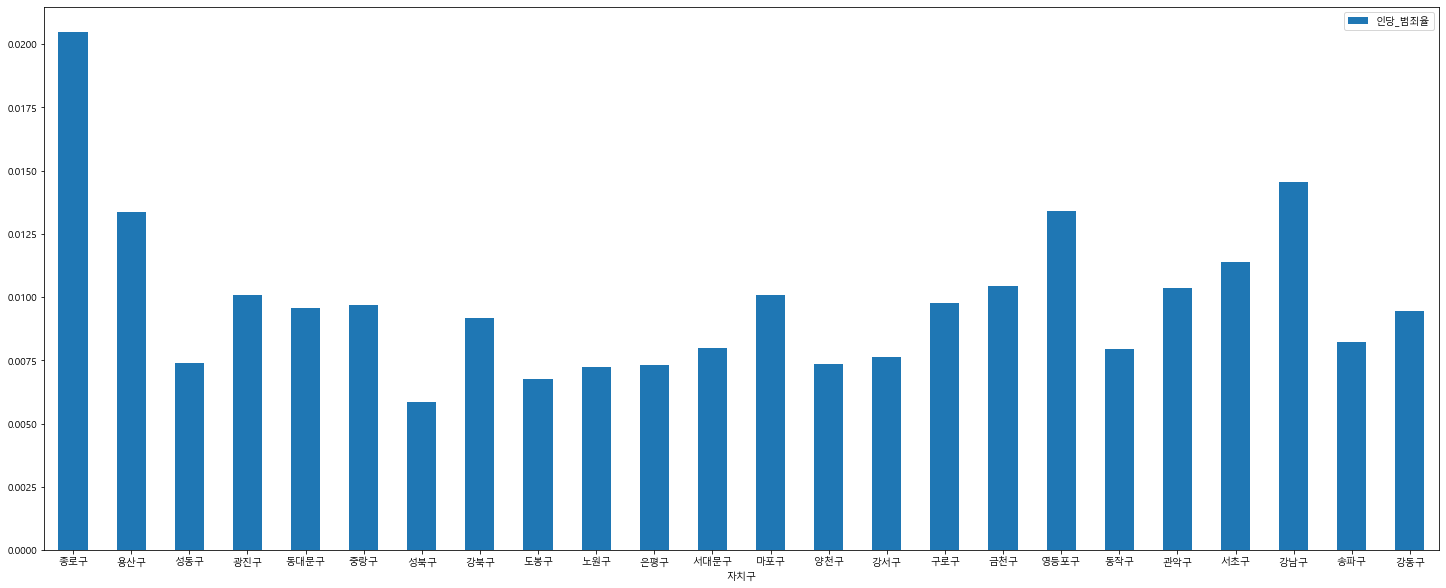

In [18]:
# data visualization
# 1. Crime occurrence and arrest per capita in Seoul

df.plot.bar(x='자치구', y='인당_범죄율', rot=0, figsize=(25,10))
plt.show()


In [19]:
# data visualization
# 1. crime rate in Seoul per distinct

m = folium.Map(
    location  = [37.566345, 126.977893],
    zoom_start=10,
    titles = 'Stamen Terrain')

folium.Choropleth(
geo_data = geo_json,
data = df,
columns = ['자치구','인당_범죄율'],
key_on='properties.name',
fill_color='BuPu',
).add_to(m)


m

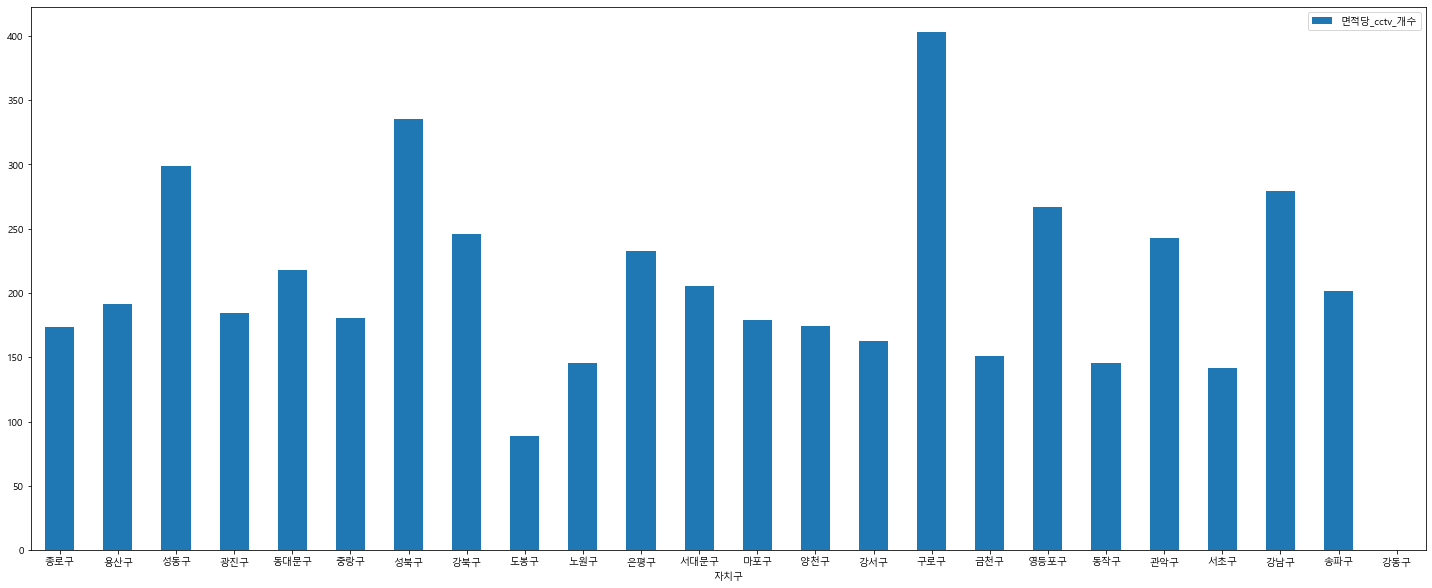

In [20]:
# 2. numbers of CCTV per area in Seoul
df.plot.bar(x='자치구', y='면적당_cctv_개수', rot=0, figsize=(25,10))
plt.show()

In [21]:
# data visualization
# Number of cctv per distinct in Seoul

m = folium.Map(
    location  = [37.566345, 126.977893],
    zoom_start=10,
    titles = 'Stamen Terrain')

folium.Choropleth(
geo_data = geo_json,
data = df,
columns = ['자치구','면적당_cctv_개수'],
key_on='properties.name',
fill_color='BuPu',
).add_to(m)


m

In [22]:
df.columns

Index(['자치구', '전체 범죄 발생 건수', '성별', '계', '0~4세', '5~9세', '10~14세', '15~19세',
       '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세',
       '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85~89세',
       '90~94세', '95세 이상+ ', '면적당_cctv_개수', '인당_범죄율'],
      dtype='object')

In [23]:
df.head(5)

,자치구,전체 범죄 발생 건수,성별,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95세 이상+,면적당_cctv_개수,인당_범죄율
0,종로구,3102,계,151581.0,3290.0,4293.0,4730.0,6309.0,14153.0,14905.0,...,11019.0,7797.0,6159.0,5404.0,3546.0,1666.0,589.0,163.0,173.768844,0.020464
1,용산구,2969,계,222307.0,6496.0,7183.0,6926.0,8125.0,13739.0,19916.0,...,15678.0,10904.0,8540.0,7162.0,4971.0,2245.0,838.0,201.0,191.098637,0.013355
2,성동구,2362,계,319475.0,10995.0,10819.0,9256.0,11771.0,24254.0,31057.0,...,22266.0,15151.0,11495.0,9103.0,5640.0,2488.0,823.0,201.0,298.813559,0.007393
3,광진구,3601,계,357176.0,9533.0,11321.0,11641.0,13908.0,28813.0,39030.0,...,25451.0,17297.0,12453.0,9389.0,5725.0,2524.0,860.0,217.0,184.415584,0.010082
4,동대문구,3401,계,355917.0,10117.0,11247.0,10616.0,13093.0,31926.0,36315.0,...,25980.0,19295.0,15091.0,12226.0,7308.0,3209.0,980.0,244.0,217.710197,0.009556


# Regression analysis
The hypothesis is "The number of CCTV will affect the crime rate.".

In this paper, crime rate means "전체 범죄 건수"/"구의 전체 인구수"
And in that theory, X is '면적당 cctv 개수' and Y is '인당 범죄발생건수'.

By doing Regression analysis, I will check the relationship between X and Y.


C:\dataanalysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='면적당_cctv_개수', ylabel='Density'>

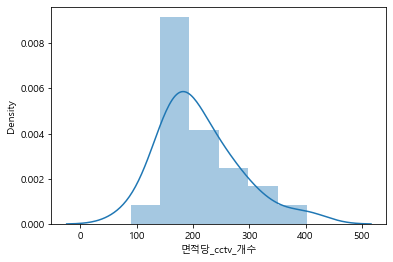

In [24]:
##1.1 distplot(X)
sns.distplot(df['면적당_cctv_개수'])


C:\dataanalysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_cctv', ylabel='Density'>

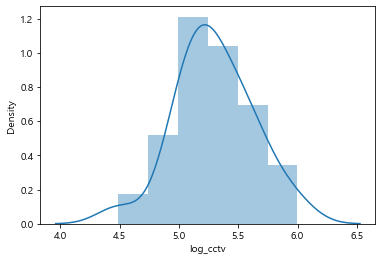

In [25]:
## 1.2 log(X)
df['log_cctv'] = df['면적당_cctv_개수'].apply(math.log)

## 1.3 displot(log(X))
sns.distplot(df['log_cctv'])

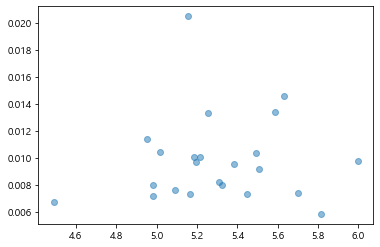

In [26]:
# scatter(y,x1)
x = df.log_cctv
y = df.인당_범죄율

plt.scatter(x,y,alpha=0.5)

In [27]:
# regression analysis: Y and X
df_ols = smf.ols('인당_범죄율~log_cctv',df).fit()
df_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 인당_범죄율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                   0.06783
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.797
Time:                        23:49:00   Log-Likelihood:                 99.844
No. Observations:                  23   AIC:                            -195.7
Df Residuals:                      21   BIC:                            -193.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0069      0.011      0.608      0.550      -0.017       0.030
log_cctv       0.0006      0.002      0.260      0.797      -0.004       0.005
==============================================================================
Omnibus:                       18.584   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.223
Skew:                           1.710   Prob(JB):                     1.49e-05
Kurtosis:                       6.390   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**short conclusion**


**Short Conclusion**
There is no relation between CCTV and crime in Seoul